<a href="https://www.kaggle.com/victortrigo/cnn-para-diagnostico-de-neumon-a?scriptVersionId=85477381" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CNN Pneumonia

In [1]:
import tensorflow as tf
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
import os


import warnings
warnings.filterwarnings("ignore")

## ETL

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4-dev) /tmp/pip-req-build-0culq997/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
l = np.random.binomial(1, 0.1, 5216)

x_train = []
y_train = []

x_val = []
y_val = []

for i in range(1,5216):
    if l[i] == 0:
            x_train.append(train[i][0])
            y_train.append(train[i][1])
    else:
            x_val.append(train[i][0])
            y_val.append(train[i][1])

In [5]:
x_test = []
y_test = []

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [6]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(x_val.shape[0], img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)
y_test = np.array(y_test)

In [8]:
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=2, dtype='float32'
)

y_val = tf.keras.utils.to_categorical(
    y_val, num_classes=2, dtype='float32'
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=2, dtype='float32'
)

In [9]:
print('train data image: ', x_train.shape)
print('test data image: ', x_test.shape)
print('val data image: ', x_val.shape)

train data image:  (4680, 150, 150, 1)
test data image:  (624, 150, 150, 1)
val data image:  (535, 150, 150, 1)


In [10]:
print('train data image: ', y_train.shape)
print('test data image: ', y_test.shape)
print('val data image: ', y_val.shape)

train data image:  (4680, 2)
test data image:  (624, 2)
val data image:  (535, 2)


## Data Viz

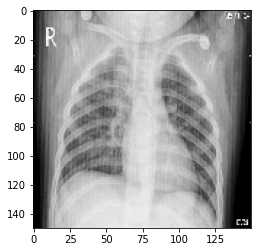

In [11]:
plt.imshow(x_train[0], cmap='gray')


## Model

In [12]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True
)

In [13]:
checkpoint = ModelCheckpoint('mejor_modelo.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

In [14]:
# model = Sequential()

# ## conv 1
# model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# ## conv 2
# model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# ## conv 3
# model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# ## conv 4
# model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# ## conv 5
# model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())

# ## conv 6
# model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizers)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# ## Clasificacion - Flatten
# model.add(Flatten())
# model.add(Dense(2, activation='softmax'))

# model.summary()

In [15]:
base_filtros = 64
w_regularizers = 1e-5

In [16]:
model = Sequential()

model.add(Conv2D(base_filtros,   (3,3), padding='same', strides=(1,1), kernel_regularizer=regularizers.l2(w_regularizers), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4)))


model.add(Conv2D(2*base_filtros, (3,3), padding='same', strides=(1,1), kernel_regularizer=regularizers.l2(w_regularizers)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

2022-01-17 19:28:48.980174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 37, 37, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 128)       5

2022-01-17 19:28:49.154581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:28:49.155282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 19:28:49.156457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-17 19:28:49.157690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy']
)

In [18]:
hist = model.fit(datagen.flow(x_train, y_train),
                 callbacks=[checkpoint],
                 steps_per_epoch=40,
                 epochs=150,
                 verbose=2,
                 validation_data=(datagen.flow(x_val, y_val))
)

2022-01-17 19:28:52.094839: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-01-17 19:28:54.245952: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


40/40 - 11s - loss: 1.5999 - accuracy: 0.7719 - val_loss: 0.5145 - val_accuracy: 0.7477

Epoch 00001: val_accuracy improved from -inf to 0.74766, saving model to mejor_modelo.hdf5
Epoch 2/150
40/40 - 3s - loss: 0.8997 - accuracy: 0.8430 - val_loss: 0.9504 - val_accuracy: 0.7477

Epoch 00002: val_accuracy did not improve from 0.74766
Epoch 3/150
40/40 - 3s - loss: 0.7169 - accuracy: 0.8869 - val_loss: 0.5997 - val_accuracy: 0.7477

Epoch 00003: val_accuracy did not improve from 0.74766
Epoch 4/150
40/40 - 4s - loss: 0.6491 - accuracy: 0.8828 - val_loss: 0.7735 - val_accuracy: 0.7477

Epoch 00004: val_accuracy did not improve from 0.74766
Epoch 5/150
40/40 - 3s - loss: 0.5195 - accuracy: 0.9078 - val_loss: 1.0141 - val_accuracy: 0.7477

Epoch 00005: val_accuracy did not improve from 0.74766
Epoch 6/150
40/40 - 3s - loss: 0.5618 - accuracy: 0.8925 - val_loss: 2.6523 - val_accuracy: 0.7477

Epoch 00006: val_accuracy did not improve from 0.74766
Epoch 7/150
40/40 - 3s - loss: 0.8444 - accur

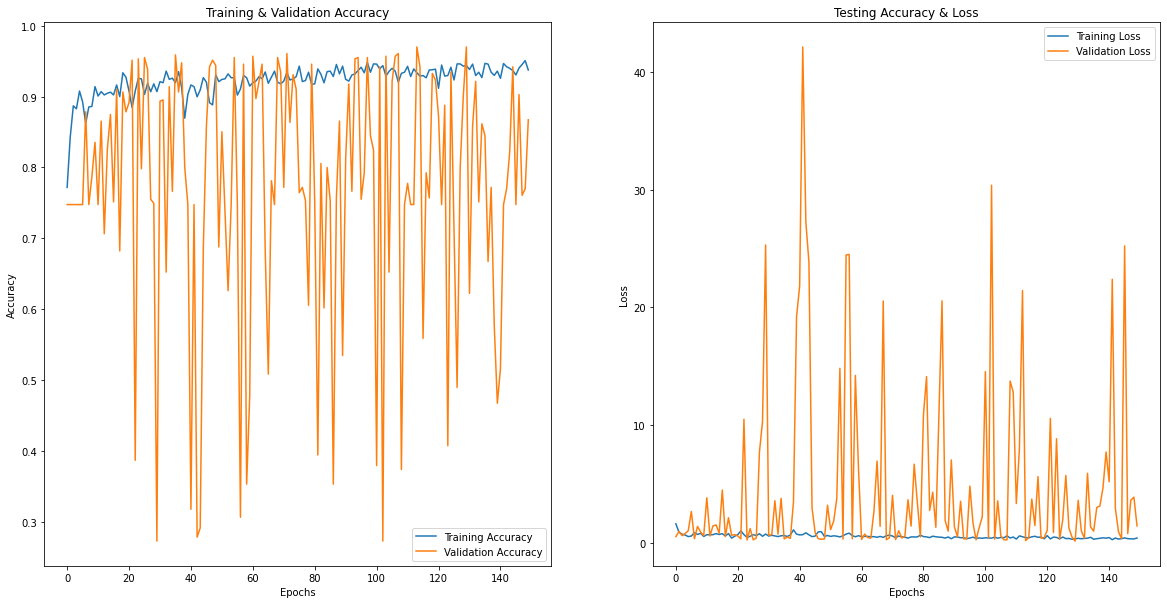

In [19]:
epochs = [i for i in range(150)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs, hist.history['accuracy'],     label='Training Accuracy')
ax[0].plot(epochs, hist.history['val_accuracy'], label= 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, hist.history['loss'],     label = 'Training Loss')
ax[1].plot(epochs, hist.history['val_loss'], label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [20]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 10ms/step - loss: 6.5361 - accuracy: 0.6651
Loss of the model is -  6.536052227020264
20/20 [==============================] - 0s 8ms/step - loss: 6.5361 - accuracy: 0.6651
Accuracy of the model is -  66.50640964508057 %


In [21]:
model2 = load_model('./mejor_modelo.hdf5')

In [22]:
print("Loss of the model is - " , model2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 8ms/step - loss: 1.0409 - accuracy: 0.8782
Loss of the model is -  1.0409398078918457
20/20 [==============================] - 0s 8ms/step - loss: 1.0409 - accuracy: 0.8782
Accuracy of the model is -  87.82051205635071 %


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
preds = model.predict(x_test, batch_size=16)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(y_test, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(624,)
(624,)


<Figure size 432x288 with 0 Axes>

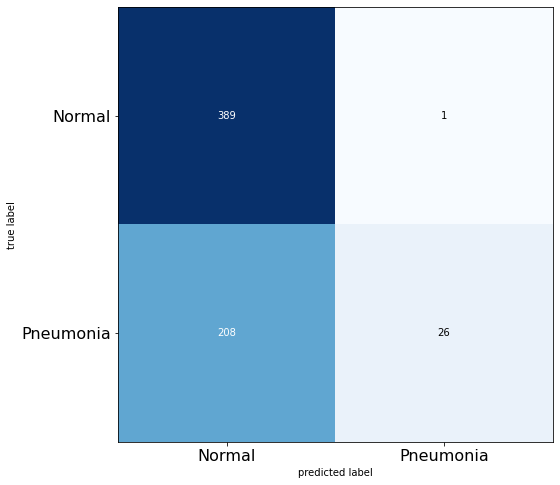

In [25]:
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()